In [1]:
import numpy as np
import pandas as pd

In [2]:
fec_all = pd.read_csv("resources/fec_2012_contribution_subset.csv", low_memory=False)
    # The date is in the format 20-JUN-11
fec_all["contb_receipt_dt"] = pd.to_datetime(fec_all["contb_receipt_dt"], format="%d-%b-%y")

    # ignore the refunds
    # Get the subset of dataset where contribution amount is positive
fec_all = fec_all[fec_all.contb_receipt_amt > 0]

    # fec_all contains details about all presidential candidates.
    # fec contains the details about contributions to Barack Obama and Mitt Romney only
    # for the rest of the tasks, unless explicitly specified, work on the fec data frame.
fec = fec_all[fec_all.cand_nm.isin(["Obama, Barack", "Romney, Mitt"])]

    # Make the original dataset as None so that it will be garbage collected
fec_all = None


In [3]:
temp = fec[
    (fec["cand_nm"] == "Obama, Barack") &
    (fec["contbr_employer"] == "GOOGLE") &
    (fec["contbr_occupation"].str.contains("ENGINEER"))
]

In [4]:
temp["contb_receipt_amt"].sum()

np.float64(41208.4)

In [5]:
fec_df = fec

In [6]:
fec_df[
    (fec_df["cand_nm"] == "Obama, Barack") 
].groupby(by="contbr_st")["contbr_nm"].count()

contbr_st
AA       74
AB        4
AE      395
AK     2036
AL     3854
      ...  
WA    20783
WI     8050
WV     1330
WY     1055
ZZ       15
Name: contbr_nm, Length: 64, dtype: int64

In [7]:
[10**i for i in range(10)]

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

In [8]:
bins = [0] +  [10**i for i in range(9)]

In [9]:
labels = []
for i in range(1, len(bins)):
    ptr_1 = bins[i - 1]
    ptr_2 = bins[i]
    temp = f"({ptr_1},{ptr_2}]"
    labels.append(temp)
labels

['(0,1]',
 '(1,10]',
 '(10,100]',
 '(100,1000]',
 '(1000,10000]',
 '(10000,100000]',
 '(100000,1000000]',
 '(1000000,10000000]',
 '(10000000,100000000]']

In [10]:
fec_df["amount_bucket"] = pd.cut(
    fec_df["contb_receipt_amt"],
    bins=bins,
    labels=labels,
    right=True
)

In [11]:
fec_df.groupby(
    ["cand_nm", "amount_bucket"]
)["contb_receipt_amt"].sum().unstack(0)

/tmp/ipykernel_29028/2110523686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fec_df.groupby(


cand_nm,"Obama, Barack","Romney, Mitt"
amount_bucket,,
"(0,1]",318.24,77.00
"(1,10]",337267.62,29819.66
"(10,100]",20288981.41,1987783.76
"(100,1000]",54798531.46,22363381.69
"(1000,10000]",51753705.67,63942145.42
"(10000,100000]",59100.00,12700.00
"(100000,1000000]",1490683.08,0.00
"(1000000,10000000]",7148839.76,0.00
"(10000000,100000000]",0.00,0.00


In [12]:
per_state_basis = fec.groupby(by = "contbr_st")["contb_receipt_amt"].sum().sort_values(ascending=False).head(10)

In [13]:
states = per_state_basis.index

In [14]:
contributions = []
for i in states:
    pass

In [15]:
(Obama, Romney) = fec[
    (fec["contbr_st"] == "CA") &
    (fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"]))
].groupby(by="cand_nm")["contb_receipt_amt"].sum()

In [16]:
fec["contb_receipt_dt"].min()
 


Timestamp('2011-04-04 00:00:00')

In [17]:
Obama / fec[
    (fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"]))
].groupby(by="cand_nm")["contb_receipt_amt"].sum()[1], Romney / per_state_basis[0]


/tmp/ipykernel_29028/1489337600.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Obama / fec[
/tmp/ipykernel_29028/1489337600.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ].groupby(by="cand_nm")["contb_receipt_amt"].sum()[1], Romney / per_state_basis[0]


(np.float64(0.2697089428996779), np.float64(0.3205019000513482))

In [18]:
per_state_basis[0]


/tmp/ipykernel_29028/1853166716.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_state_basis[0]


np.float64(35062620.84)

In [19]:
fec[
    (fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"]))
].groupby(by="cand_nm")["contb_receipt_amt"].sum()[1]

/tmp/ipykernel_29028/1179898766.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fec[


np.float64(88335907.53)

In [20]:
start_date = fec["contb_receipt_dt"].min()
start_date = np.datetime64(str(start_date.year) + "-01-01")

In [21]:
final_end_date = fec["contb_receipt_dt"].max()

In [22]:
quaterly_romney = []
quarterly_obama = []
while final_end_date >= start_date:
    total = fec[
        (fec["contb_receipt_dt"] >= start_date) &
        (fec["contb_receipt_dt"] <= (start_date + pd.DateOffset(months=3))) &
        (fec["cand_nm"] == "Obama, Barack")
    ]["contb_receipt_amt"].sum()
    temp = (start_date, total)
    quarterly_obama.append(temp)

    # update the time
    start_date = start_date + pd.DateOffset(months=3)
    pass

In [23]:
for i in quaterly_romney:
    print(i)

In [24]:
def get_quater_from_df(fec: pd.DataFrame, candidate: str) -> list:
    start_date = fec["contb_receipt_dt"].min()
    start_date = np.datetime64(str(start_date.year) + "-01-01")

    # Final Date
    final_end_date = fec["contb_receipt_dt"].max()

    # Store
    total = 0
    quaterly = []
    while final_end_date >= start_date:
        total = total + fec[
            (fec["contb_receipt_dt"] >= start_date) &
            (fec["contb_receipt_dt"] <= (start_date + pd.DateOffset(months=3))) &
            (fec["cand_nm"] == candidate)
        ]["contb_receipt_amt"].sum() / 1e8

        temp = (start_date, total)
        start_date = start_date + pd.DateOffset(months=3)
        if total == 0:
            continue
        quaterly.append(temp)

        # update the time
    return quaterly

In [25]:
Obama_quarters = get_quater_from_df(fec, "Obama, Barack")
Romney_quarters = get_quater_from_df(fec,"Romney, Mitt" )

print(Obama_quarters)
print("\n")
print(Romney_quarters)

[(Timestamp('2011-04-01 00:00:00'), np.float64(0.2715163846)), (Timestamp('2011-07-01 00:00:00'), np.float64(0.5084971644)), (Timestamp('2011-10-01 00:00:00'), np.float64(0.7563481341)), (Timestamp('2012-01-01 00:00:00'), np.float64(1.2066998979)), (Timestamp('2012-04-01 00:00:00'), np.float64(1.3648097009000002))]


[(Timestamp('2011-04-01 00:00:00'), np.float64(0.17338137990000002)), (Timestamp('2011-07-01 00:00:00'), np.float64(0.29673599040000004)), (Timestamp('2011-10-01 00:00:00'), np.float64(0.5175461368000001)), (Timestamp('2012-01-01 00:00:00'), np.float64(0.7875272824)), (Timestamp('2012-04-01 00:00:00'), np.float64(0.8846717213))]


In [26]:
fec


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,amount_bucket
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02-01,NaN,NaN,NaN,SA17A,780124,"(10,100]"
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02-01,NaN,NaN,NaN,SA17A,780124,"(100,1000]"
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,2012-04-13,NaN,NaN,NaN,SA17A,785689,"(100,1000]"
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,2011-08-21,NaN,NaN,NaN,SA17A,760261,"(10,100]"
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,2012-03-07,NaN,NaN,NaN,SA17A,780128,"(10,100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,2012-02-26,NaN,NaN,NaN,SA17A,787803,"(10,100]"
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,2012-01-20,NaN,NaN,NaN,SA17A,775668,"(100,1000]"
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,2012-01-20,NaN,NaN,NaN,SA17A,775668,"(1,10]"
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,2012-04-26,NaN,NaN,NaN,SA17A,785239,"(10,100]"


In [27]:
import matplotlib.pyplot as plt

(array([1.3667e+04, 9.9950e+03, 1.2927e+04, 1.8860e+03, 2.9630e+03,
        3.9300e+02, 1.2587e+04, 8.6900e+02, 1.2300e+02, 3.4100e+02,
        2.7000e+01, 4.7000e+01, 1.0623e+04, 4.3000e+01, 5.9000e+01,
        1.2000e+01, 1.5000e+01, 3.3000e+01, 2.5700e+02, 2.3000e+01,
        6.0000e+00, 1.8000e+01, 2.9000e+01, 1.6000e+01, 1.2009e+04,
        8.0000e+00, 7.0000e+00, 1.2000e+01, 1.8000e+01, 5.9000e+01,
        2.0000e+00, 6.3600e+02, 1.7000e+01, 2.0000e+00, 2.6000e+01,
        1.0000e+00, 1.9000e+01, 1.3560e+03, 2.0000e+00, 8.0000e+00,
        2.0000e+00, 6.0000e+00, 1.2000e+01, 4.5000e+01, 1.9000e+01,
        2.0000e+00, 7.0000e+00, 1.4000e+01, 5.0000e+00, 1.3220e+03]),
 array([1.00000e+00, 4.09800e+01, 8.09600e+01, 1.20940e+02, 1.60920e+02,
        2.00900e+02, 2.40880e+02, 2.80860e+02, 3.20840e+02, 3.60820e+02,
        4.00800e+02, 4.40780e+02, 4.80760e+02, 5.20740e+02, 5.60720e+02,
        6.00700e+02, 6.40680e+02, 6.80660e+02, 7.20640e+02, 7.60620e+02,
        8.00600e+02, 8.405

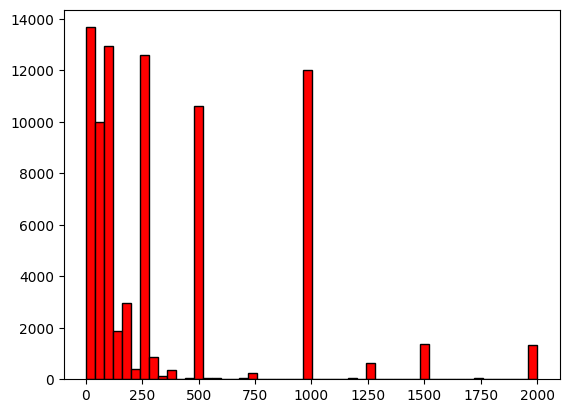

In [31]:
contri = fec[
    (fec["cand_nm"] == "Romney, Mitt") &
    (fec["contb_receipt_amt"] <= 2000)
]["contb_receipt_amt"]
plt.hist(contri, color="red", edgecolor="black", bins=50)

In [54]:
temp = fec[fec["cand_nm"]=="Obama, Barack"].groupby(by=["contbr_st"])[["contbr_st", "contb_receipt_amt"]]

In [57]:
temp.groupby()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [64]:
(fec[fec["cand_nm"] == "Romney, Mitt"].groupby("contbr_st")['contb_receipt_amt'].sum() / 1e7)

contbr_st
AA    0.000013
AE    0.000568
AK    0.008620
AL    0.052730
AP    0.000166
        ...   
WA    0.134152
WI    0.027032
WV    0.012673
WY    0.025260
XX    0.040025
Name: contb_receipt_amt, Length: 61, dtype: float64